<a href="https://colab.research.google.com/github/AbdullahFEliwa/Fifa-player-analysis/blob/main/Fifa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
! mkdir ~/.kaggle/

In [6]:
!cp /content/drive/MyDrive/projects/kaggle_1.json ~/.kaggle/kaggle.json

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download sanjeetsinghnaik/fifa-23-players-dataset

Dataset URL: https://www.kaggle.com/datasets/sanjeetsinghnaik/fifa-23-players-dataset
License(s): CC0-1.0
  0% 0.00/2.25M [00:00<?, ?B/s]
100% 2.25M/2.25M [00:00<00:00, 133MB/s]


In [9]:
!unzip fifa-23-players-dataset.zip

Archive:  fifa-23-players-dataset.zip
  inflating: Fifa 23 Players Data.csv  


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df= pd.read_csv("Fifa 23 Players Data.csv")


In [12]:
df.head(10)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
5,M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,https://cdn.sofifa.net/players/209/331/23_60.png,30,...,90,85,90,74,71,74,70,61,70,25
6,T. Courtois,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,https://cdn.sofifa.net/players/192/119/23_60.png,30,...,34,35,34,32,34,32,32,32,32,90
7,M. Neuer,Manuel Neuer,90,90,13500000,GK,GK,Germany,https://cdn.sofifa.net/players/167/495/23_60.png,36,...,47,53,47,39,46,39,38,37,38,90
8,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,90,90,41000000,ST,ST,Portugal,https://cdn.sofifa.net/players/020/801/23_60.png,37,...,87,81,87,65,62,65,61,56,61,23
9,V. van Dijk,Virgil van Dijk,90,90,98000000,CB,CB,Netherlands,https://cdn.sofifa.net/players/203/376/23_60.png,30,...,73,79,73,83,88,83,85,90,85,23


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Value(in Euro)               18539 non-null  int64 
 5   Positions Played             18539 non-null  object
 6   Best Position                18539 non-null  object
 7   Nationality                  18539 non-null  object
 8   Image Link                   18539 non-null  object
 9   Age                          18539 non-null  int64 
 10  Height(in cm)                18539 non-null  int64 
 11  Weight(in kg)                18539 non-null  int64 
 12  TotalStats                   18539 non-null  int64 
 13  BaseStats                    18

No Null values


In [14]:
df=df.drop(["Full Name","Image Link", "Club Position", "National Team Position", "Club Jersey Number", "National Team Name", "National Team Image Link", "National Team Position", "National Team Jersey Number"], axis=1)


In [15]:
df=df.drop(["ST Rating", "LW Rating", "RW Rating", "LF Rating", "CF Rating", "RF Rating", "CAM Rating", "CM Rating", "LM Rating", "RM Rating", "CDM Rating"
                    , "LWB Rating", "RWB Rating", "LB Rating", "CB Rating", "RB Rating", "GK Rating" ], axis=1)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Known As                  18539 non-null  object
 1   Overall                   18539 non-null  int64 
 2   Potential                 18539 non-null  int64 
 3   Value(in Euro)            18539 non-null  int64 
 4   Positions Played          18539 non-null  object
 5   Best Position             18539 non-null  object
 6   Nationality               18539 non-null  object
 7   Age                       18539 non-null  int64 
 8   Height(in cm)             18539 non-null  int64 
 9   Weight(in kg)             18539 non-null  int64 
 10  TotalStats                18539 non-null  int64 
 11  BaseStats                 18539 non-null  int64 
 12  Club Name                 18539 non-null  object
 13  Wage(in Euro)             18539 non-null  int64 
 14  Release Clause        

In [17]:
playPosition =df['Positions Played']
playPosition

,Positions Played
0,RW
1,"CF,ST"
2,ST
3,"CM,CAM"
4,"ST,LW"
...,...
18534,"ST,RM"
18535,CDM
18536,CM
18537,CB


In [18]:
df["Positions Played"]=df["Positions Played"].apply(lambda x:len(x.split(",")))

In [19]:
df

,Known As,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),...,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes
0,L. Messi,91,91,54000000,1,CAM,Argentina,35,169,67,...,75,96,20,35,24,6,11,15,14,8
1,K. Benzema,91,91,64000000,2,CF,France,34,185,81,...,84,90,43,24,18,13,11,5,5,7
2,R. Lewandowski,91,91,84000000,1,ST,Poland,33,185,81,...,90,88,35,42,19,15,6,12,8,10
3,K. De Bruyne,91,91,107500000,2,CM,Belgium,31,181,70,...,83,89,68,65,53,15,13,5,10,13
4,K. Mbappé,91,95,190500000,2,ST,France,23,182,73,...,80,88,26,34,32,13,5,7,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,47,56,110000,2,CAM,Republic of Ireland,21,174,68,...,40,47,39,29,27,6,9,5,13,8
18535,Yang Dejiang,47,57,90000,1,CDM,China PR,17,175,60,...,33,45,46,50,52,6,12,11,8,6
18536,L. Mullan,47,67,130000,1,RM,Northern Ireland,18,170,65,...,43,59,39,37,48,11,12,8,7,12
18537,D. McCallion,47,61,100000,1,CB,Republic of Ireland,17,178,65,...,37,41,50,54,54,8,14,13,7,8


In [20]:
df["Contract Until"].unique()

array(['2023', '2025', '2024', '2026', '2027', '2022', '2028', '-',
       '2031', '2032'], dtype=object)

In [21]:
df[df["Contract Until"]=='-']

,Known As,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),...,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes
438,T. Vaclík,80,80,0,1,GK,Czech Republic,33,188,85,...,13,63,20,18,18,78,75,74,82,83
447,G. Ochoa,80,80,0,1,GK,Mexico,36,185,78,...,16,60,21,10,12,82,73,70,81,84
548,A. Talavera,79,79,0,1,GK,Mexico,39,186,85,...,44,60,26,13,14,80,82,68,78,80
831,D. Lovren,78,78,0,1,CB,Croatia,32,188,84,...,52,69,76,82,83,14,14,13,10,7
865,M. Borjan,77,77,0,1,GK,Canada,34,196,84,...,34,60,21,23,21,78,74,75,74,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15193,A. Suhail,60,68,0,2,CB,Qatar,23,182,73,...,37,49,55,61,59,10,8,6,14,5
16404,D. Djamas,58,74,0,2,LB,Cyprus,18,182,73,...,30,45,45,57,55,9,10,7,7,10
16424,S. Kittos,58,68,0,1,GK,Cyprus,20,186,75,...,16,35,11,13,14,62,59,55,54,60
17308,S. Georgiou,55,70,0,2,ST,Cyprus,17,183,77,...,40,47,36,36,38,16,8,14,7,13


In [22]:
df["Contract Until"]=df["Contract Until"].replace("-","2023")

In [23]:
df["Joined On"].unique()

array([2021, 2009, 2022, 2015, 2018, 2017, 2011, 2010, 2014, 2016, 2020,
       2019, 2013, 2012, 2008, 2007, 2006, 2004, 2005, 2002, 2003])

In [24]:
df["Attacking Work Rate"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [25]:
df["International Reputation"].unique()

array([5, 4, 3, 2, 1])


*   Base stats Refer To the beginning of a player's career mode include attributes such as pace, shooting, passing, dribbling, defending, and physicality

*   Total stats Refer To cumulative numerical value that summarizes a player's overall skill level in FIFA

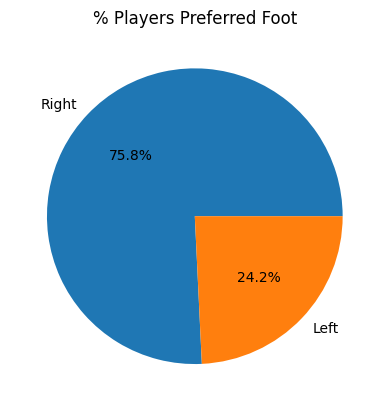

In [26]:
import seaborn as sns

plt.pie( df['Preferred Foot'].value_counts() ,  labels=df['Preferred Foot'].value_counts().index, autopct='%1.1f%%' )
plt.title("% Players Preferred Foot")
plt.show()

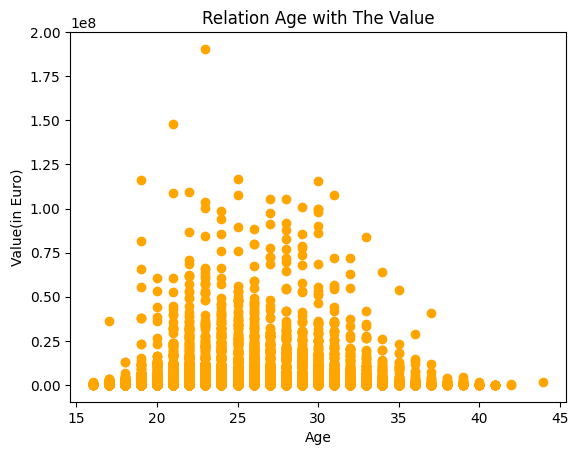

In [27]:

plt.scatter(df['Age'],df['Value(in Euro)'], c = 'orange')

plt.xlabel('Age')
plt.ylabel('Value(in Euro)')

plt.title("Relation Age with The Value")
plt.show()

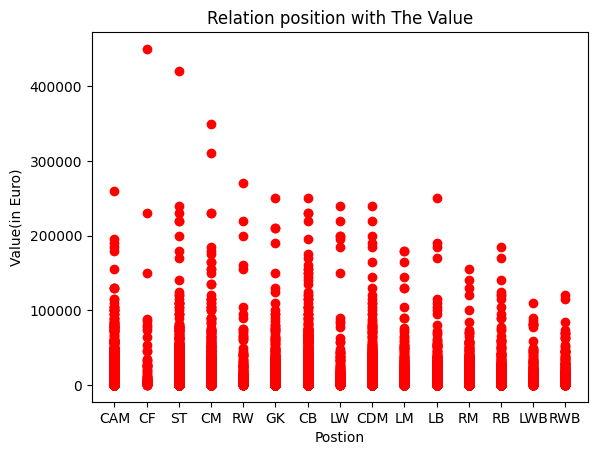

In [28]:
plt.scatter(df['Best Position'],df['Wage(in Euro)'], c = 'red')

plt.xlabel('Postion')
plt.ylabel('Value(in Euro)')

plt.title("Relation position with The Value")
plt.show()

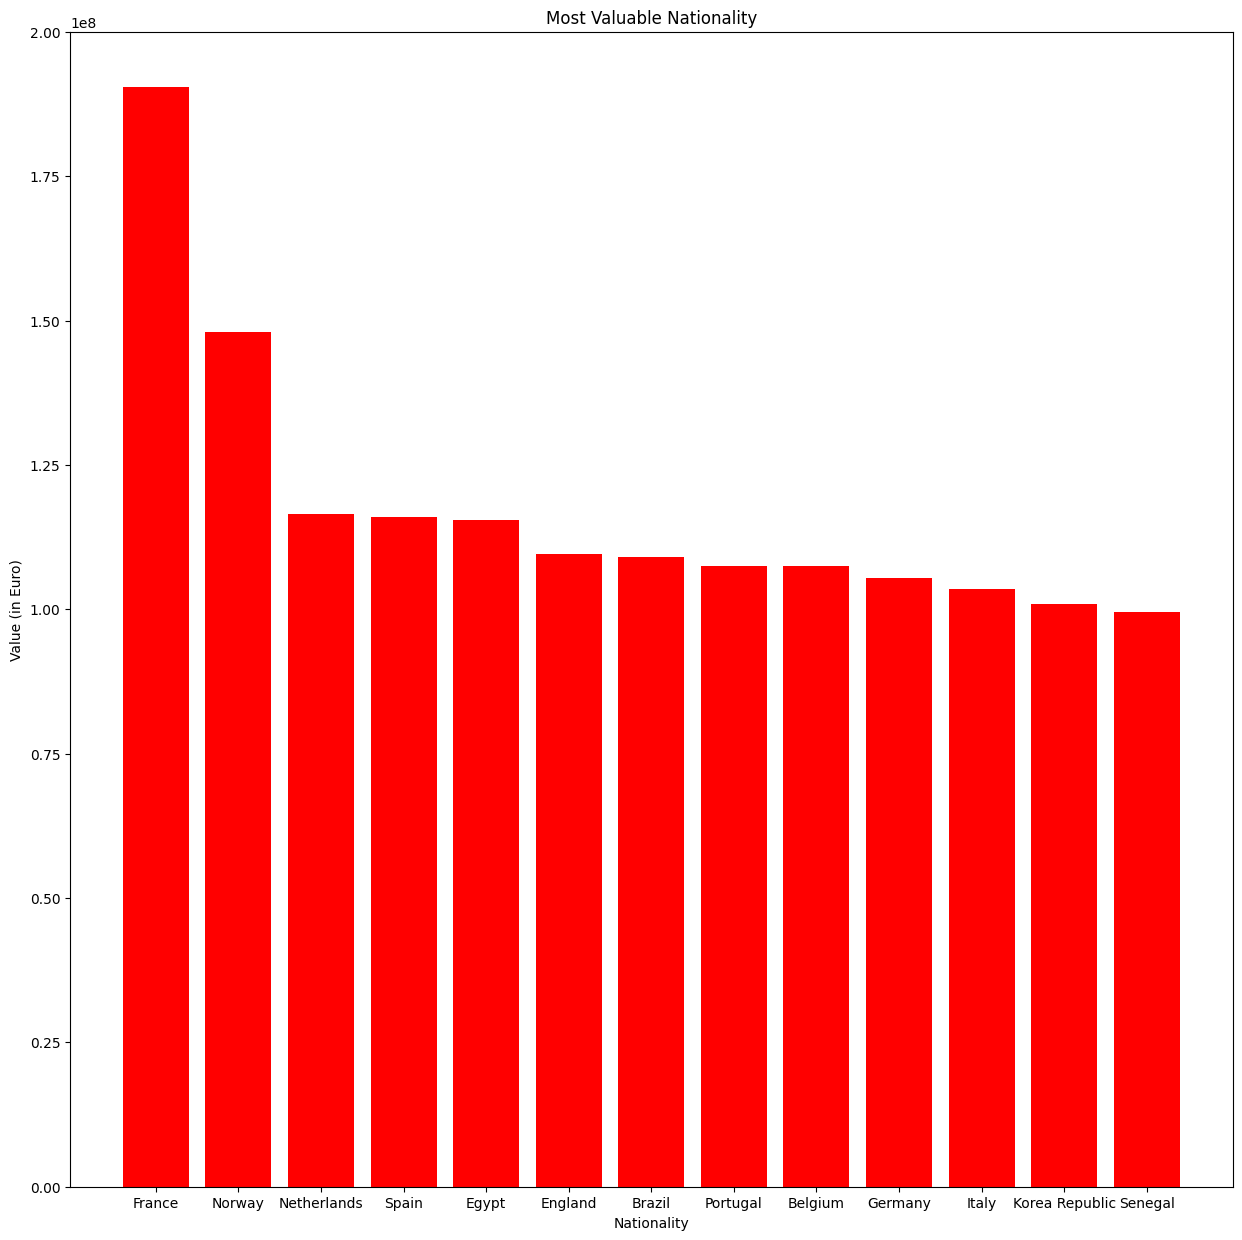

In [29]:
plt.figure(figsize=(15,15))
df1=df.sort_values('Value(in Euro)', ascending = False)
df1_Top_10 = df1
plt.bar( df1_Top_10['Nationality'][:15], df1_Top_10['Value(in Euro)'][:15] ,color='red')

plt.xlabel("Nationality")
plt.ylabel("Value (in Euro)")
plt.title('Most Valuable Nationality')

plt.show()

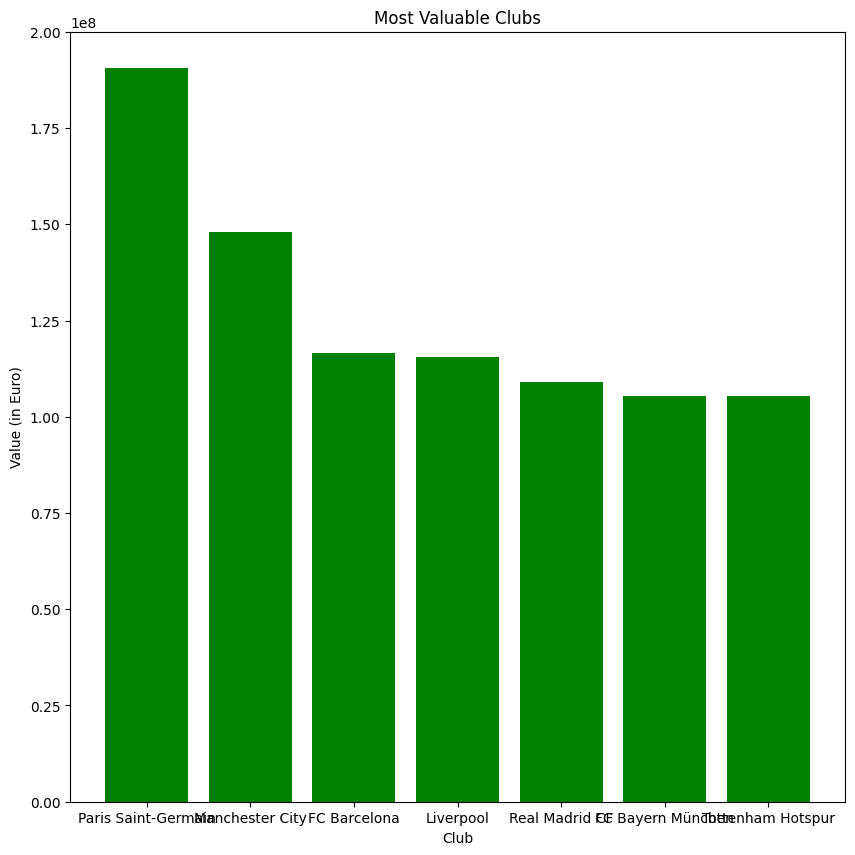

In [30]:
plt.figure(figsize=(10,10))
df2 = df.sort_values('Value(in Euro)', ascending = False)
df2_top_15 = df2
plt.bar( df2_top_15['Club Name'][:15], df2_top_15['Value(in Euro)'][:15] ,color='green')

plt.xlabel("Club")
plt.ylabel("Value (in Euro)")
plt.title('Most Valuable Clubs')

plt.show()

In [31]:
df2_group = df2.groupby('Club Name')

In [32]:
sum_values = df2_group['Value(in Euro)'].sum()

In [33]:
print(sum_values)

Club Name
1. FC Heidenheim 1846         36650000
1. FC Kaiserslautern          29905000
1. FC Köln                   126535000
1. FC Magdeburg               32450000
1. FC Nürnberg                37850000
                               ...    
Ümraniyespor                  23240000
İstanbul Başakşehir FK        64325000
İstanbulspor                  14975000
İttifak Holding Konyaspor     32525000
Śląsk Wrocław                 21540000
Name: Value(in Euro), Length: 679, dtype: int64


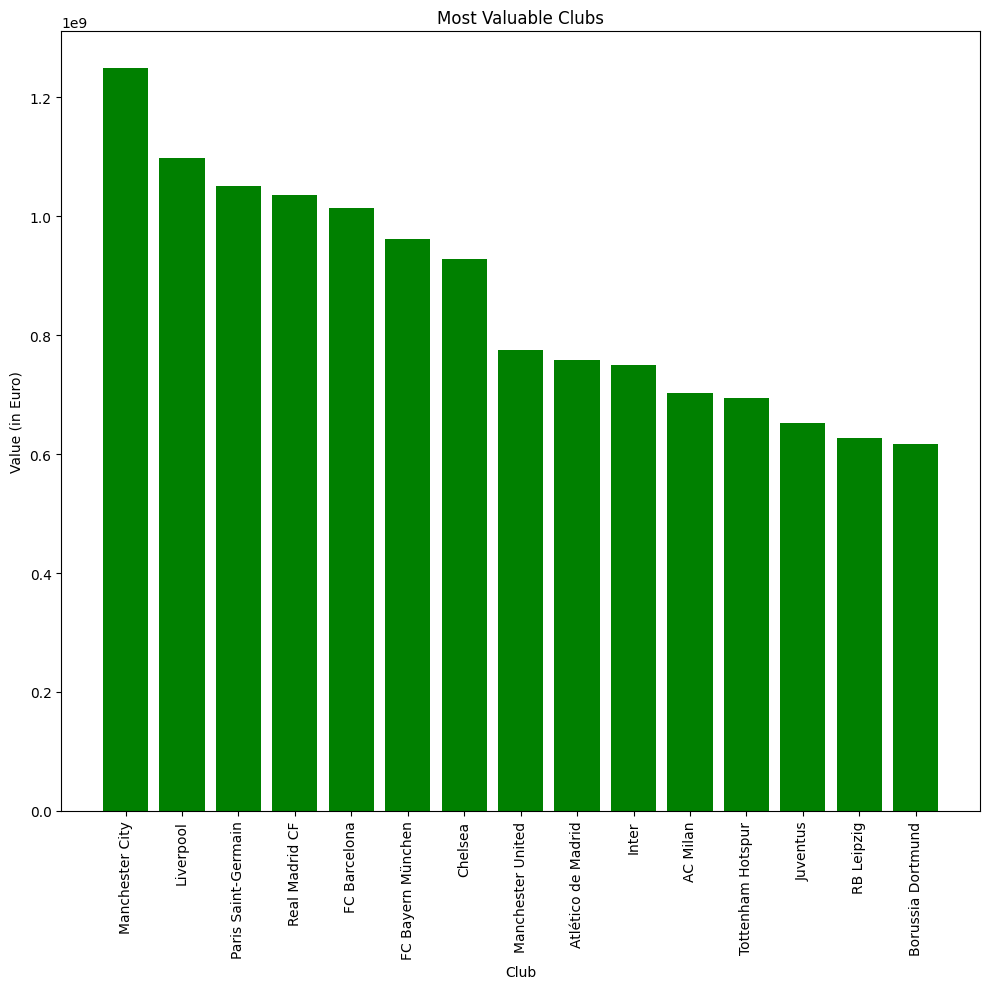

In [37]:
plt.figure(figsize=(10,10))
top_15_clubs = sum_values.sort_values(ascending=False)[:15]
plt.bar(top_15_clubs.index, top_15_clubs.values, color='green')

plt.xlabel("Club")
plt.ylabel("Value (in Euro)")
plt.title('Most Valuable Clubs')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()